<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have South Jersey been Counties Neglected for too Long? A Comprehensive Analyis of Socioeconomic Disparities in New Jersey**

The inspiration behind my research is that New jersey is one the racially diverse states of the United States. According to the American immigration Council, nearly 1 in 4 New Jersey residents is an immigrant. Despite poverty level remaining below 20% across New Jersey counties, there is a worrying concern about South Jersey counties that is visible through low life expectancy, high unemployment rates, high poverty rates, and unequal distribution of public resources like healthcare and education.

In [478]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [479]:
!pip install mapclassify
import mapclassify #need for thematic map classification

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 County_Boundaries_of_NJ.xml
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.cpg
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.dbf
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.prj
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.prj			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.shp			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.shx			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.cpg
 coll_univ.zip						 new-jersey-schools.dbf
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.prj
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.shp
 County_Boundaries_of_NJ.geojson			 new-jersey-schools.shx
 County_Boundaries_of_NJ.geojson.1			 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson.2			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.3			 nj_counties.zip
 County_Boundaries_of_NJ.geojs

<Axes: >

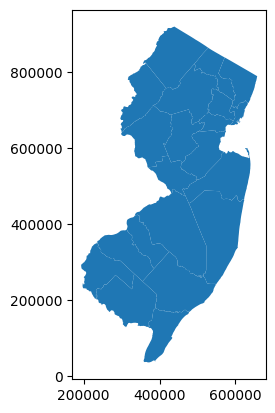

In [480]:
! wget -q -O nj_counties.zip https://github.com/Brian13Noble/GIS/raw/main/County_Boundaries_of_N.zip
!ls
zip_ref = zipfile.ZipFile('/content/nj_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('/content/County_Boundaries_of_NJ.shp') #load the shapefile with gpd as nj_counties

#Make the map
nj_counties.plot()

# **Differences in Life Expectancy in New Jersey by County**

In [481]:
file_path = '/content/Additional Measure Data.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
    !wget -q https://github.com/Brian13Noble/GIS/raw/main/Additional%20Measure%20Data.xlsx

# Now read the Excel file into a DataFrame
add_measures = pd.read_excel(file_path, skiprows=1)

In [482]:
drop_columns = ['Life Expectancy (AIAN)', 'Life Expectancy (AIAN) 95% CI - Low', 'Life Expectancy (AIAN) 95% CI - High']
add_measures = add_measures.drop(columns = drop_columns)

In [483]:
pd.options.display.float_format = '{:.1f}'.format

In [484]:
add_measures.drop(0, inplace=True)

In [485]:
add_measures= add_measures[['County','Life Expectancy','Life Expectancy (Asian)',
'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)', '# Deaths']]
add_measures= add_measures.iloc[0:,:]
add_measures['County'] = add_measures['County'].str.upper()
add_measures

,County,Life Expectancy,Life Expectancy (Asian),Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths
1,ATLANTIC,76.7,89.6,71.4,80.9,76.6,4148
2,BERGEN,82.1,89.6,78.7,84.9,81.2,7666
3,BURLINGTON,79.1,87.3,76.8,84.3,79.0,5362
4,CAMDEN,76.7,89.5,72.2,79.3,77.2,7316
5,CAPE MAY,76.9,NaN,72.2,88.5,76.9,1656
6,CUMBERLAND,74.6,81.8,71.5,77.2,74.6,2549
7,ESSEX,78.0,89.1,73.5,81.8,81.3,10371
8,GLOUCESTER,77.2,88.1,74.0,84.4,77.1,3900
9,HUDSON,80.5,88.5,73.9,82.9,78.5,6617
10,HUNTERDON,83.2,84.8,89.2,84.9,83.1,1102


In [486]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=add_measures,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [487]:
#nj_counties[['COUNTY','County','_merge']]

In [488]:
#nj_counties.dtypes

<Axes: >

[]

[]

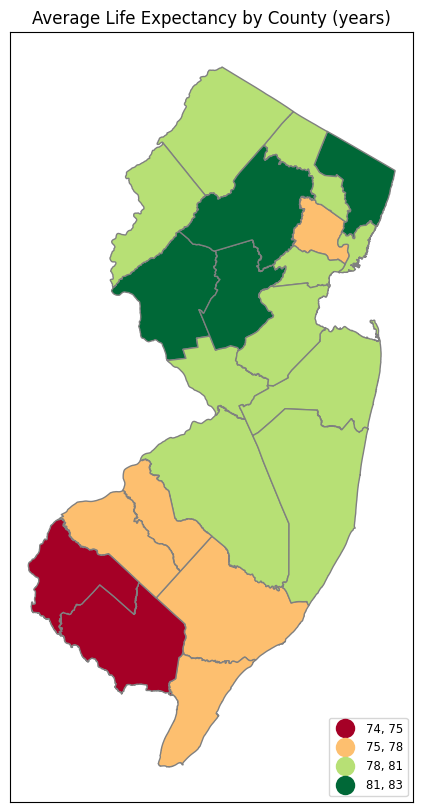

In [489]:
fig, ax = plt.subplots(1, figsize=(6,10))
nj_counties.plot(ax=ax,column='Life Expectancy',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=4,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Average Life Expectancy by County (years)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks



Generally, there is a Low life expectancy that ranges between 74 and 78 years in South Jersey counties like Cape May, Cumberland, Salem, Atalantic, Gloucester and camden. It is also worth noting a low-life expectancy in Essex county, which is sorrounded by counties that have an overall higher life expectancy.  



In [490]:
#nj_counties.dtypes

## Life Expectancy in New jersey by Race and County

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Life Expectancy by Race')

Text(0.5, 0, 'County')

Text(0, 0.5, 'Life Expectancy')

([<matplotlib.axis.XTick at 0x79c4fb8323e0>,
 [Text(0.3, 0, 'ATLANTIC'),
  Text(1.3, 0, 'BERGEN'),
  Text(2.3, 0, 'BURLINGTON'),
  Text(3.3, 0, 'CAMDEN'),
  Text(4.3, 0, 'CAPE MAY'),
  Text(5.3, 0, 'CUMBERLAND'),
  Text(6.3, 0, 'ESSEX'),
  Text(7.3, 0, 'GLOUCESTER'),
  Text(8.3, 0, 'HUDSON'),
  Text(9.3, 0, 'HUNTERDON'),
  Text(10.3, 0, 'MERCER'),
  Text(11.3, 0, 'MIDDLESEX'),
  Text(12.3, 0, 'MONMOUTH'),
  Text(13.3, 0, 'MORRIS'),
  Text(14.3, 0, 'OCEAN'),
  Text(15.3, 0, 'PASSAIC'),
  Text(16.3, 0, 'SALEM'),
  Text(17.3, 0, 'SOMERSET'),
  Text(18.3, 0, 'SUSSEX'),
  Text(19.3, 0, 'UNION'),
  Text(20.3, 0, 'WARREN')])

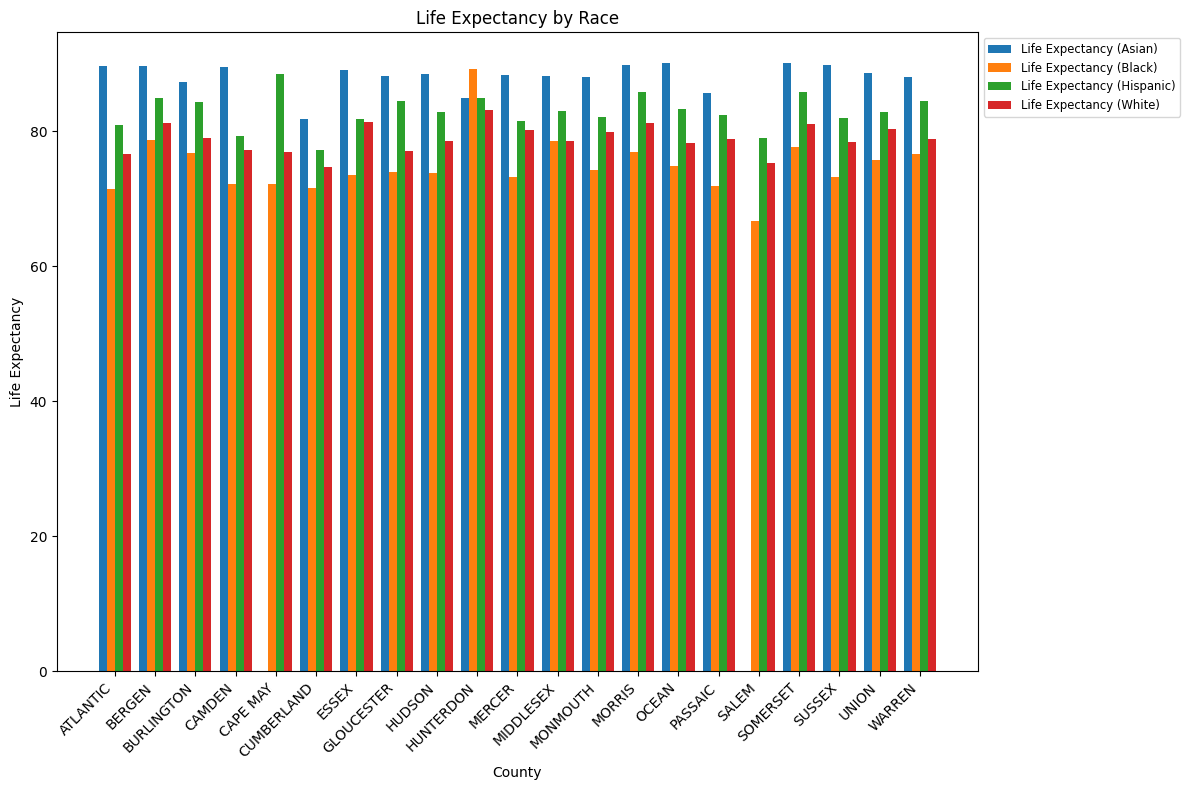

In [491]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'add_measures' is your DataFrame with race-specific life expectancy data
categories = ['Life Expectancy (Asian)', 'Life Expectancy (Black)', 'Life Expectancy (Hispanic)', 'Life Expectancy (White)']
bar_width = 0.2  # Adjust the width of each bar as needed

county_indices = np.arange(len(add_measures['County']))
bar_offsets = np.arange(len(categories)) * bar_width

fig, ax = plt.subplots(figsize=(12, 8))

for i, category in enumerate(categories):
    ax.bar(county_indices + bar_offsets[i], add_measures[category], width=bar_width, label=category)

plt.title('Life Expectancy by Race')
plt.xlabel('County')
plt.ylabel('Life Expectancy')

# Move the legend outside the plot to the right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Rotate x-axis tick labels for better visibility
plt.xticks(county_indices + 0.3, add_measures['County'], rotation=45, ha='right')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()

As the graph indicates the Asians have the highest life expectancy in New Jersey. It is also worth noting that they are among the richest ethnic groups in New jersey. Therefore, majority of the Asians live in wealthy neighbours, implying that few of them live in South Jersey. Additionally, Black-Americans have an overall low life expectancy, and that could explain the reason behind low life expectancy in Essex county where majority of them live. Additionally, it is important to note that blacks have an overall higher life expectancy in Hunterdon compared to other races. Therefore, race also contributes to the socio-economic disparities in New Jersey, considering that wealthy people like the Asians live in developed neighbourhoods while the poor cluster in poverty ridden counties like the South Jersey.

# **Acess to College and University Level Education in New jersey**

In [492]:
!wget -q -O coll_univ.zip https://github.com/Brian13Noble/GIS/raw/main/Colleges_and_Universities_in_NJ.zip
!ls
zip_ref = zipfile.ZipFile('/content/coll_univ.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
coll_univ=gpd.read_file('/content/Colleges_and_Universities_in_NJ.shp') #load the shapefile with gpd

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 County_Boundaries_of_NJ.xml
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.cpg
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.dbf
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.prj
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.prj			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.shp			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.shx			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.cpg
 coll_univ.zip						 new-jersey-schools.dbf
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.prj
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.shp
 County_Boundaries_of_NJ.geojson			 new-jersey-schools.shx
 County_Boundaries_of_NJ.geojson.1			 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson.2			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.3			 nj_counties.zip
 County_Boundaries_of_NJ.geojs

<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(0.5, 1.0, 'Colleges and Universities in New Jersey')

<ipython-input-493-a77cb48c4eb1>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


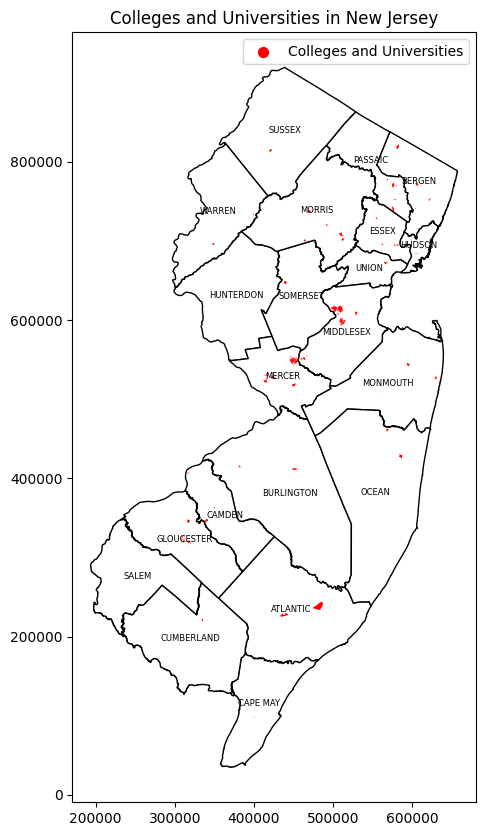

In [493]:
# Plot New Jersey counties
ax = nj_counties.plot(color='white', edgecolor='black', figsize=(6, 10))

# Plot college and university points on top of counties
coll_univ.plot(ax=ax, color='red', marker='o', markersize=20, label='Colleges and Universities')

# Annotate county names
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Create a scatter plot with a single red dot for the legend
legend_dot = ax.scatter([], [], color='red', marker='o', s=50, label='Colleges and Universities')

# Set plot title
plt.title('Colleges and Universities in New Jersey')

# Display the legend with the specified labels
plt.legend()

# Show the plot
plt.show()




While there are more Universities and colleges in counties like Essex and Bergen, the map indicates that there are few to none colleges and universities in South Jersey counties like Cape May, Salem, and Cumberland. Such a disparity in contributes significantly to skewed economic growth and development of New Jersey.  

# Access to Elementary and High School Education in New Jersey

In [494]:
!wget -q -O new_jersey_schools.zip https://github.com/Brian13Noble/GIS/raw/main/kx-new-jersey-schools-SHP.zip

!ls
zip_ref = zipfile.ZipFile('/content/new_jersey_schools.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
new_jersey_schools=gpd.read_file('/content/new-jersey-schools.shp') #load the shapefile with gpd

'2010 Annual Average Labor Force Estimates in NJ.xlsx'	 County_Boundaries_of_NJ.xml
'2022 Annual Labor Force Estimates in NJ.xlsx'		 Hospitals_in_NJ.cpg
'Additional Measure Data.xlsx'				 Hospitals_in_NJ.dbf
 Colleges_and_Universities_in_NJ.cpg			 Hospitals_in_NJ.prj
 Colleges_and_Universities_in_NJ.dbf			 Hospitals_in_NJ.shp
 Colleges_and_Universities_in_NJ.prj			 Hospitals_in_NJ.shx
 Colleges_and_Universities_in_NJ.shp			 Hospitals_in_NJ.xml
 Colleges_and_Universities_in_NJ.shx			'New Jersey Population.xlsx'
 Colleges_and_Universities_in_NJ.xml			 new-jersey-schools.cpg
 coll_univ.zip						 new-jersey-schools.dbf
 County_Boundaries_of_NJ.cpg				 new-jersey-schools.prj
 County_Boundaries_of_NJ.dbf				 new-jersey-schools.shp
 County_Boundaries_of_NJ.geojson			 new-jersey-schools.shx
 County_Boundaries_of_NJ.geojson.1			 new-jersey-schools.txt
 County_Boundaries_of_NJ.geojson.2			 new_jersey_schools.zip
 County_Boundaries_of_NJ.geojson.3			 nj_counties.zip
 County_Boundaries_of_NJ.geojs

<Axes: >

Text(446845.6710124223, 234718.67854269317, 'ATLANTIC')

Text(608674.9722902415, 775344.9010707563, 'BERGEN')

Text(445032.1629263677, 380367.81326114654, 'BURLINGTON')

Text(362990.6130646281, 353685.88343532046, 'CAMDEN')

Text(407013.1101655159, 114992.2381988394, 'CAPE MAY')

Text(319542.7506195712, 197359.46040190206, 'CUMBERLAND')

Text(562253.4894993025, 711675.2449586024, 'ESSEX')

Text(311865.8974070625, 322476.6418932246, 'GLOUCESTER')

Text(608428.8356156062, 694107.9908810152, 'HUDSON')

Text(377595.22464250773, 631790.897850177, 'HUNTERDON')

Text(435851.76357316674, 528225.6265984694, 'MERCER')

Text(569736.7056196764, 519774.2489392704, 'MONMOUTH')

Text(553566.9451515895, 382793.6503082593, 'OCEAN')

Text(547109.8753648106, 801736.5245332896, 'PASSAIC')

Text(253014.76795156772, 275761.5670788178, 'SALEM')

Text(459788.9851800551, 630164.5125110017, 'SOMERSET')

Text(439531.57573730504, 839964.9957279859, 'SUSSEX')

Text(545391.285890184, 665430.058250928, 'UNION')

Text(354517.27771581686, 737502.1613603798, 'WARREN')

Text(479789.7234040614, 738913.4075898962, 'MORRIS')

Text(516625.77448491874, 584830.6357102803, 'MIDDLESEX')

Text(0.5, 1.0, 'Distribution of schools in New jersey')

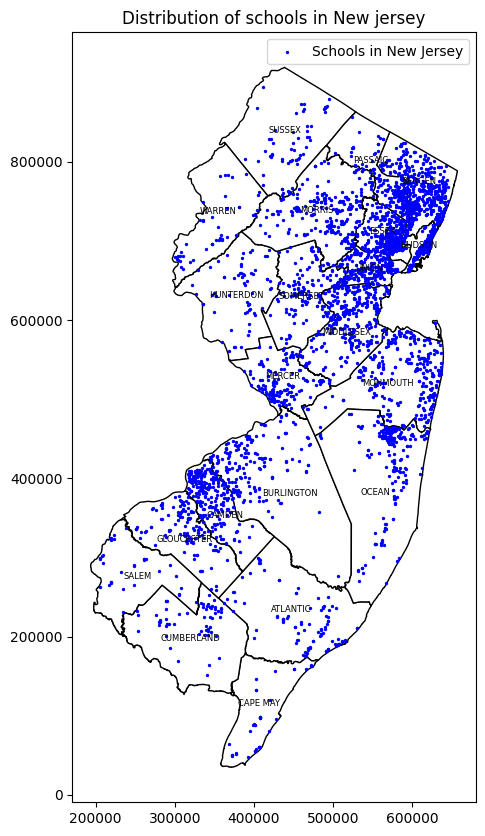

In [495]:
# Plot New Jersey counties
ax = nj_counties.plot(color='white', edgecolor='black', figsize=(15, 10))

# Plot college and university points on top of counties
new_jersey_schools.plot(ax=ax, color='blue', marker='o', markersize=2, label='Schools in New Jersey')

# Annotate county names
for x, y, label in zip(nj_counties.geometry.centroid.x, nj_counties.geometry.centroid.y, nj_counties['COUNTY']):
    ax.text(x, y, label, color = 'black' , fontsize=6, ha='center', va='center')

# Set plot title and show the plot
plt.title('Distribution of schools in New jersey')
plt.legend()  # Add this line to display the legend
plt.show()

Access to elementary and high school level education seems easier in North Jersey compared to South Jersey, considering that schools are more clustered in counties like Bergen, Hudson, and Union while sparsely distributed in counties like Cape May, Cumberland, and Salem.   

# Change in Unemployment Rate in New Jersey Between 2010 and 2022

In [496]:
file_path = '/content/2010 Annual Average Labor Force Estimates in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/2010%20Annual%20Average%20Labor%20Force%20Estimates%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
unemployment1 = pd.read_excel(file_path, skiprows=2)


In [497]:
unemployment1['County'] = unemployment1['County'].str.upper()

In [498]:
unemployment1=unemployment1.dropna()

In [499]:
unemployment1

,County,Labor Force,Employment,Unemployment,Unemployment Rate (%)
0,ATLANTIC,140527.0,122988.0,17539.0,12.5
1,BERGEN,480364.0,441308.0,39056.0,8.1
2,BURLINGTON,236893.0,215253.0,21640.0,9.1
3,CAMDEN,264642.0,235220.0,29422.0,11.1
4,CAPE MAY,50222.0,43082.0,7140.0,14.2
5,CUMBERLAND,72646.0,63067.0,9579.0,13.2
6,ESSEX,382784.0,340655.0,42129.0,11.0
7,GLOUCESTER,152479.0,136584.0,15895.0,10.4
8,HUDSON,354023.0,319751.0,34272.0,9.7
9,HUNTERDON,68375.0,63243.0,5132.0,7.5


In [504]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=unemployment1,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

<ipython-input-504-e611f7bef8e8>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'County_x'} in the result is deprecated and will raise a MergeError in a future version.
  nj_counties = pd.merge(


In [505]:
#nj_counties[['COUNTY','County_x','_merge']]

In [506]:
#nj_counties.dtypes

In [507]:
file_path = '/content/2022 Annual Labor Force Estimates in NJ.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/2022%20Annual%20Labor%20Force%20Estimates%20in%20NJ.xlsx

# Now read the Excel file into a DataFrame
unemployment2 = pd.read_excel(file_path, skiprows=2)

In [508]:
unemployment2['County'] = unemployment2['County'].str.upper()

In [509]:
unemployment2=unemployment2.dropna()

In [510]:
unemployment2.rename(columns={'Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

In [511]:
unemployment2.rename(columns={'Unemployment': 'Unemployment(2022)'}, inplace=True)

In [512]:
unemployment2


,County,Labor Force,Employment,Unemployment(2022),Unemployment Rate
0,ATLANTIC,122846.0,116536.0,6310.0,5.1
1,BERGEN,504149.0,487246.0,16903.0,3.4
2,BURLINGTON,247859.0,239613.0,8246.0,3.3
3,CAMDEN,270737.0,259883.0,10854.0,4.0
4,CAPE MAY,47294.0,44225.0,3069.0,6.5
5,CUMBERLAND,69282.0,65773.0,3509.0,5.1
6,ESSEX,388106.0,370619.0,17487.0,4.5
7,GLOUCESTER,161341.0,155427.0,5914.0,3.7
8,HUDSON,377212.0,363531.0,13681.0,3.6
9,HUNTERDON,68083.0,66102.0,1981.0,2.9


In [513]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=unemployment2,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

<ipython-input-513-e49142d8d6cd>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Employment_x', 'Labor Force_x'} in the result is deprecated and will raise a MergeError in a future version.
  nj_counties = pd.merge(


In [514]:
nj_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,ATLANTIC,ATLANTIC,both
1,BERGEN,BERGEN,both
2,BURLINGTON,BURLINGTON,both
3,CAMDEN,CAMDEN,both
4,CAPE MAY,CAPE MAY,both
5,CUMBERLAND,CUMBERLAND,both
6,ESSEX,ESSEX,both
7,GLOUCESTER,GLOUCESTER,both
8,HUDSON,HUDSON,both
9,HUNTERDON,HUNTERDON,both


In [516]:
#nj_counties.dtypes

Text(0.5, 1.0, 'Unemployment Rate in 2010 by County (%)')

[]

[]

Text(0.5, 1.0, 'Unemployment Rate in 2022 by County (%)')

[]

[]

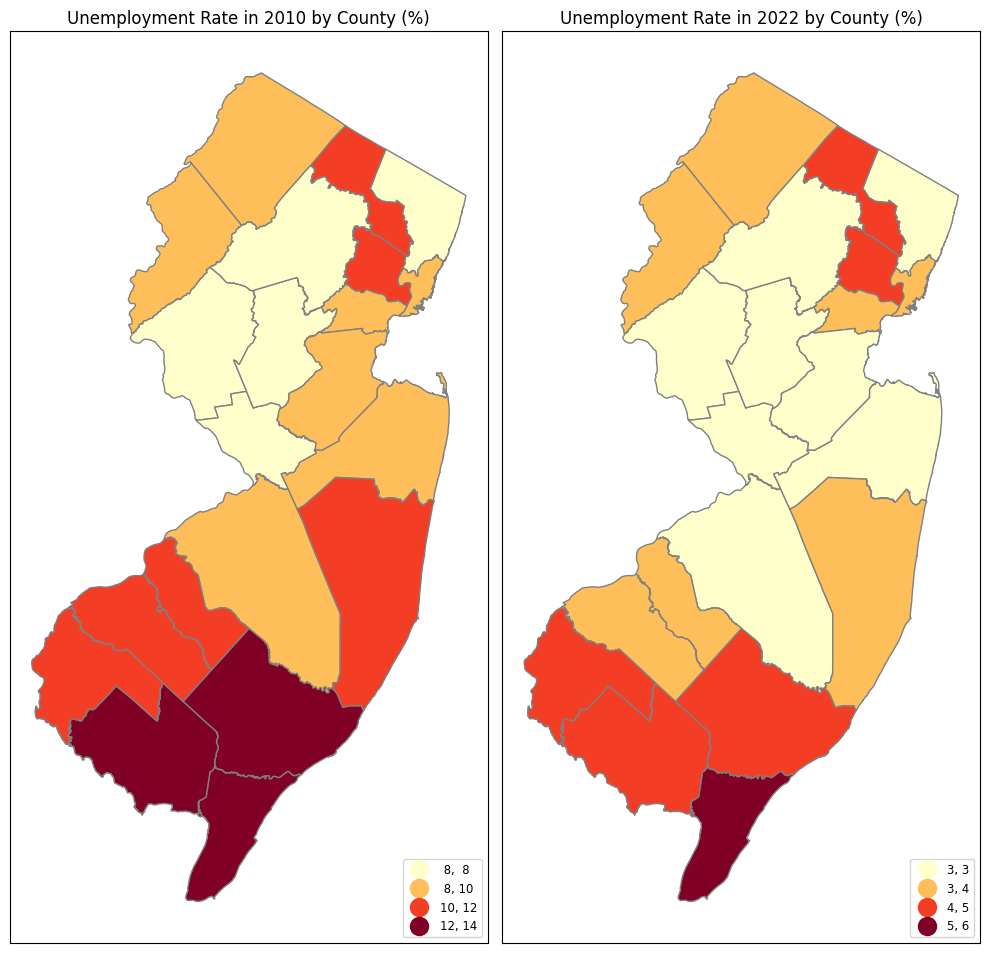

In [518]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame for life expectancy named nj_life_expectancy
# Replace 'your_data_here' with your actual data for life expectancy

# Plot New Jersey counties with hospitals
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# First subplot: Unemployment Rate
ax1 = nj_counties.plot(ax=axes[0], column='Unemployment Rate (%)', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=4,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax1.set_title("Unemployment Rate in 2010 by County (%)")
ax1.set_xticks([])  # kills xticks
ax1.set_yticks([])  # kills yticks

# Second subplot: Life Expectancy
ax2 = nj_counties.plot(ax=axes[1], column='Unemployment Rate', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=4,
                       edgecolor='grey', linewidth=1,
                       legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium', 'fontsize': 'small', 'markerscale': 1.4})
ax2.set_title("Unemployment Rate in 2022 by County (%)")
ax2.set_xticks([])  # kills xticks
ax2.set_yticks([])  # kills yticks

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Between 2010 and 2022, there has been an overall decline in unemployment from the hights of 14% to highs 6% respectively. However, unemployment rate is still high in counties like Cape May, Cumberland, Salem, Essex, and Passaic. Such differences in unmeployment indicate that North jersey counties are performing better economically compared to South Jersey counties.  

# Exploring the Correlation between Average Median Income and Poverty in New Jersey in 2018

In [519]:
file_path = '/content/NJ Median Income.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/NJ%20Median%20Income.xlsx

  # Now read the Excel file into a DataFrame
med_income = pd.read_excel(file_path)

In [520]:
med_income['County'] = med_income['County'].str.upper()

In [522]:
#med_income

In [523]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=med_income,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

<ipython-input-523-590d8ed8f2d2>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'County_x'} in the result is deprecated and will raise a MergeError in a future version.
  nj_counties = pd.merge(


In [535]:
#nj_counties[['COUNTY','County_x','_merge']]

In [524]:
file_path = '/content/Poverty in New Jersey.xlsx'

# Check if the file already exists
if not os.path.isfile(file_path):
    # Download the file if it doesn't exist
  !wget -q https://github.com/Brian13Noble/GIS/raw/main/Poverty%20in%20New%20Jersey.xlsx

  # Now read the Excel file into a DataFrame
nj_pov = pd.read_excel(file_path)

In [525]:
nj_pov['County'] = nj_pov['County'].str.upper()

In [526]:
# Drop the existing '_merge' column if it exists in nj_counties
if '_merge' in nj_counties.columns:
    nj_counties = nj_counties.drop('_merge', axis=1)

# Perform the merge
nj_counties = pd.merge(
    left=nj_counties,
    right=nj_pov,
    left_on='COUNTY',
    right_on='County',
    how='outer',
    indicator=True
)

In [528]:
#nj_pov

In [529]:
#nj_counties[['COUNTY','County_x','_merge']]

In [531]:
#nj_counties.dtypes

In [532]:
#import numpy as np
HcP = nj_counties.copy()
HcP["geometry"] = HcP["geometry"].centroid


<Axes: >

[]

[]

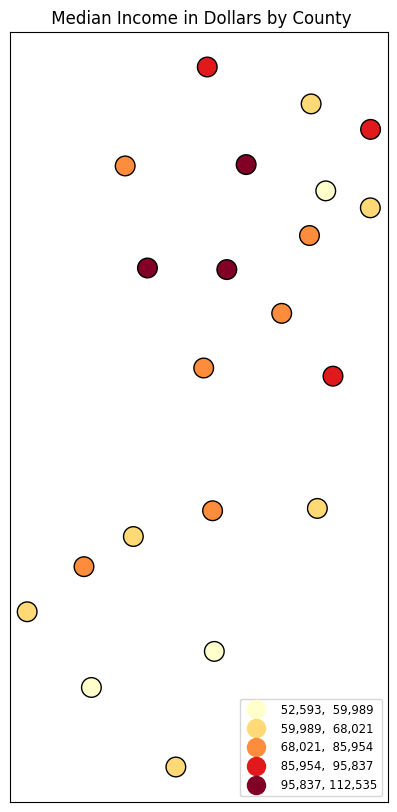

In [533]:
filterig, ax = plt.subplots(1, figsize=(6,10))
HcP.plot(ax=ax,column= "Income(Dollars)",legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text(" Median Income in Dollars by County")
ax.set_xticks([]); ax.set_yticks([])

<Axes: >

<Axes: >

[]

[]

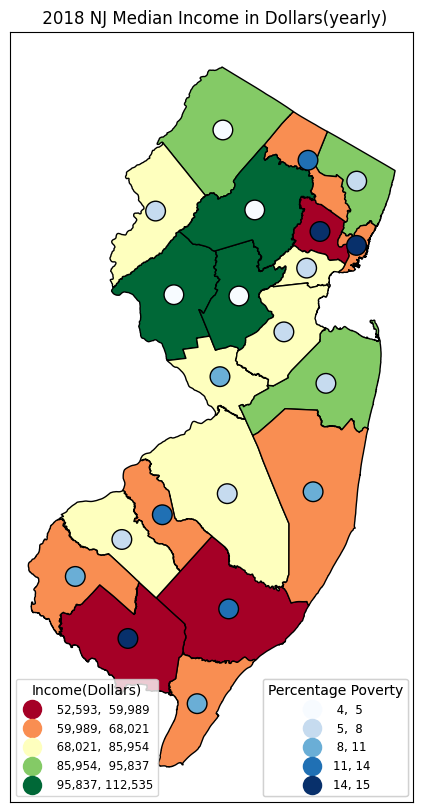

In [534]:
fig, ax = plt.subplots(1, figsize=(10,10))
nj_counties.plot(ax=ax,column="Income(Dollars)",legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''Income(Dollars)''')

HcP.plot(ax=ax,column='Value(Percent)',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text(" 2018 NJ Median Income in Dollars(yearly)")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title(''' Poverty Rate by County (%)''')



ax.add_artist(l2)
ax.add_artist(l1)
l2.set_title('''Percentage Poverty''')

Observation: As displayed on the map, there is a strong correlation between median income and percentage poverty in New jeresy. Cumberland is one the South jersey counties, which has the highest poverty rate and lowest median household income. Generally, majority of the South Jersey counties have a higher poverty rate and low yearly median income. Hunterdon, Somerset and Morris stand out as counties whose population has the highest median income, implying that poverty rate is low.

# Conclusions and Recommendations

The key findings from the research show that there is an existing socioeconomic gap between North and South Jersey counties. While life expectancy remains higher in the North, the average life expectancy in the South is progressively declining. Additionally, access to essential public services like education remain a challenge in the South because of inadequate resources and learning facilities. Additionally, the Asians who are among the wealthy NJ residents tend to occupy the North Jersey counties while the blacks are the majority in South Jersey counties. It is also clear that poverty and unemployment have remained higher in South jersey for many decades.

The inadequate resources and opportunities in the South are a threat to a prosperous NJ as they facilitate other negative factors like crime, drug and substance abuse, mental health problems, and low quality of life.

Therefore the NJ leadership together with the County admistration have the responsibility of partnering in reviving the South Jersey counties that are currently underperfoming in many sectors. Striving to reduce the gap between the South and the North will contribute to reduction in segregation, which is a major obstacle hindering peaceful coexistence in NJ.







# **Resources**
1. https://www.njoag.gov/programs/nj-cares/nj-cares-suspected-overdose-deaths/
2. https://www.americanimmigrationcouncil.org/sites/default/files/research/immigrants_in_new_jersey.pdf
3. https://www.indexmundi.com/facts/united-states/quick-facts/new-jersey/multiple-race-population-percentage#table
4. https://njogis-newjersey.opendata.arcgis.com/datasets/newjersey::county-boundaries-of-nj/explore
5. https://koordinates.com/layer/97263-new-jersey-schools/
6. https://njogis-newjersey.opendata.arcgis.com/datasets/newjersey::colleges-and-universities-in-nj/about
